    # Automatic Jupyter Notebook for OpenML dataset 150: covertype

In [1]:
from scripts.preamble import *
did = 150
data = oml.datasets.get_dataset(did)
task, topList, strats = printTopNFlows(did, 10) 
topList 

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,flow,score
0,weka.Bagging_J48(2),0.997148
1,weka.END_ND_J48(2),0.996268
2,weka.RandomCommittee_RandomTree(2),0.992928
3,sklearn.ensemble.forest.RandomForestClassifier...,0.991304
4,sklearn.ensemble.forest.RandomForestClassifier...,0.991180
5,sklearn.tree.tree.DecisionTreeClassifier(3),0.954026
6,weka.LogitBoost_DecisionStump(2),0.867403
7,weka.LogitBoost_DecisionStump(2),0.854004
8,weka.RacedIncrementalLogitBoost_DecisionStump(2),0.851081
9,weka.MultiBoostAB_NaiveBayes(2),0.775246


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


Complexity threshold to determine if an algorithm will be run.


In [3]:
comp = 50000000000000

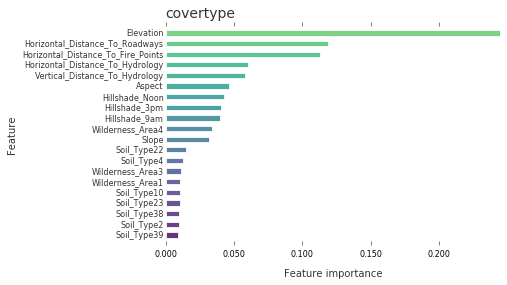

In [4]:
from scripts.featureImportance import *
featureImportance(data) 

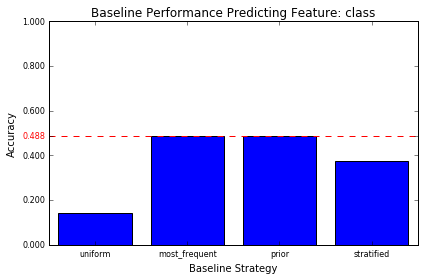

In [5]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Median execution time in ms: 20371270.0
Mean execution time in ms: 20371270.0


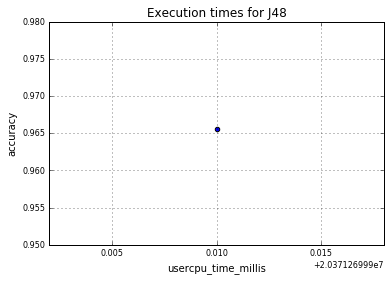

Number of folds would increase the complexity over the given threshold, number of folds has been set to: 2
Median execution time in ms: 362990.0
Mean execution time in ms: 387832.5


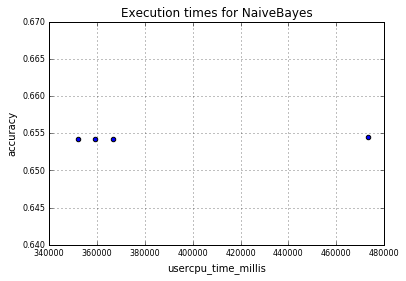

computation complexity too high, please run manually if desired.
computation complexity too high, please run manually if desired.
computation complexity too high, please run manually if desired.


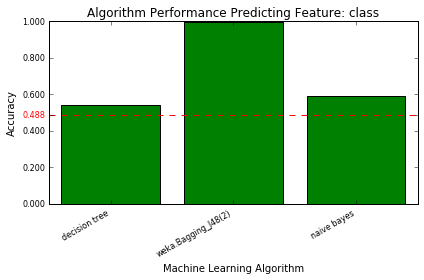

In [6]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 